# S09 T01: Tasca Feature Engineering

Descripció:

Aprèn a gestionar paràmetres amb Python.

Objectius:

- Pre-processar les dades realitzant feature engineering
- Interpretar els diferents conceptes de feature engineering

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
features_df = pd.read_csv('feature_engineering.csv') 

In [3]:
# lets check the glimpse of first five rows of athletes dataframefeatures_df.head()

Sex   Age  Height  Weight  NOC          Sport  Medal
0   M  24.0   180.0    80.0  CHN     Basketball      0
1   M  23.0   170.0    60.0  CHN           Judo      0
2   F  21.0   185.0    82.0  NED  Speed Skating      0
3   F  21.0   185.0    82.0  NED  Speed Skating      0
4   F  25.0   185.0    82.0  NED  Speed Skating      0

In [5]:
# shape of dataframe
print('Shape of DF {}\n'.forta(tfeatures_df.shape))

Shape of DF (206165, 7)



In [6]:
## getting an overview of our datafeatures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206165 entries, 0 to 206164
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     206165 non-null  object 
 1   Age     206165 non-null  float64
 2   Height  206165 non-null  float64
 3   Weight  206165 non-null  float64
 4   NOC     206165 non-null  object 
 5   Sport   206165 non-null  object 
 6   Medal   206165 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 11.0+ MB


In [7]:
# summary statisticsfeatures_df.describe()

Age         Height         Weight          Medal
count  206165.000000  206165.000000  206165.000000  206165.000000
mean       25.055509     175.371950      70.688337       0.146392
std         5.483096      10.546088      14.340338       0.353500
min        11.000000     127.000000      25.000000       0.000000
25%        21.000000     168.000000      60.000000       0.000000
50%        24.000000     175.000000      70.000000       0.000000
75%        28.000000     183.000000      79.000000       0.000000
max        71.000000     226.000000     214.000000       1.000000

In [8]:
# lets check for missing valuesfeatures_df.isnull().sum()

Sex       0
Age       0
Height    0
Weight    0
NOC       0
Sport     0
Medal     0
dtype: int64

In [9]:
features_df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Sport', 'Medal'], dtype='object')

In [10]:
# groupby for medal and gender then calculate mean for numerical features features_df.groupby(['Medal', 'Sex']).mean().astype(int)

Age  Height  Weight
Medal Sex                     
0     F     23     167      59
      M     25     178      75
1     F     24     170      63
      M     25     181      79

## Up to here it is necessary to run to perform exercises 1, 2 and 3

**Nivell 1**

- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

In [11]:
# Target column
target_column = ['Medal']

# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in features_df.columns if features_df.dtypes[col] == 'object']

# creating list of numerical columns to standardized data 
numerical_columns = [col for col in features_df.columns if ((features_df.dtypes[col] != 'object') & (col not in ['Medal','Year']))]

print(f'Target column is: {target_column}')
print(f'Numerical Features are : {numerical_columns}')
print(f'Categorical Features are : {categorical_columns}')

Target column is: ['Medal']
Numerical Features are : ['Age', 'Height', 'Weight']
Categorical Features are : ['Sex', 'NOC', 'Sport']


In [13]:
# Pipeline by numerical features:
# * Replace the mean by NaN
# * Standardize using StandardScaler()

numerical_pipe = Pipeline([('imputer', SimpleImputer(strategy = 'median')),('scaler', StandardScaler())])

# Pipeline by categorical features
# * Encode categorical variables using OneHotEncoder()
categorical_pipe = Pipeline([('ohe', OneHotEncoder(sparse = False))])


# Mix of the two pipelineserocesnsumnTransar = Comsformer( t ransformers=[('num_transf', numerical_pipe, numerical_columns),
                                               ('cansf', categpipe_colums)])eal_columns)]), catengoric
X = pfit_tfafeaturefeatures_dfrsform(data);

In [14]:
# The name of the new columns is stored
cat_columns_new = preprocessor.named_transformers_['cat_transf']['ohe'].get_feature_names(categorical_columns).tolist()
columns = numerical_columns + cat_columns_new

In [15]:
X_df = pd.DataFrame(X, columns=columns)
X_df.head()

Age    Height    Weight  Sex_F  Sex_M  NOC_AFG  NOC_AHO  NOC_ALB  \
0 -0.192503  0.438842  0.649335    0.0    1.0      0.0      0.0      0.0   
1 -0.374882 -0.509380 -0.745336    0.0    1.0      0.0      0.0      0.0   
2 -0.739640  0.912952  0.788802    1.0    0.0      0.0      0.0      0.0   
3 -0.739640  0.912952  0.788802    1.0    0.0      0.0      0.0      0.0   
4 -0.010124  0.912952  0.788802    1.0    0.0      0.0      0.0      0.0   

   NOC_ALG  NOC_AND  ...  Sport_Table Tennis  Sport_Taekwondo  Sport_Tennis  \
0      0.0      0.0  ...                 0.0              0.0           0.0   
1      0.0      0.0  ...                 0.0              0.0           0.0   
2      0.0      0.0  ...                 0.0              0.0           0.0   
3      0.0      0.0  ...                 0.0              0.0           0.0   
4      0.0      0.0  ...                 0.0              0.0           0.0   

   Sport_Trampolining  Sport_Triathlon  Sport_Tug-Of-War  Sport_Volleyball  \
0                 0.0              0.0               0.0               0.0   
1                 0.0              0.0               0.0               0.0   
2                 0.0              0.0               0.0               0.0   
3                 0.0              0.0               0.0               0.0   
4                 0.0              0.0               0.0               0.0   

   Sport_Water Polo  Sport_Weightlifting  Sport_Wrestling  
0               0.0                  0.0              0.0  
1               0.0                  0.0              0.0  
2               0.0                  0.0              0.0  
3               0.0                  0.0              0.0  
4               0.0                  0.0              0.0  

[5 rows x 287 columns]

**Nivell 2**

- Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

## PCA

**PCA** is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components. You can refer to this article to learn more about **PCA**. For your quick reference, below are some of the key points you should know about **PCA** before proceeding further:

A principal component is a linear combination of the original variables Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component Third principal component tries to explain the variance which is not explained by the first two principal components and so on

As the dataset is small having less features we will use only 3 components or dimensions to see how much much variance it is covering

In [16]:
# Principal component analysis applied to numerical variablesN_COMPONENTS = 3

pca = PCA(n_compeenntn =  N_COMPONNES3)
pca_result = pca.fit_transform(X)

pca_columns = [A_{x i for x in range'  rangN_COMPONENTS + 1)]

pca_df = pd.DataFrame(pca_result, columns = pumns)
ca_colpca_df['Medal'] = features_df[target_column].to_numpy()    # The target column is addeds added
pca_df.sample(5)

PCA_1     PCA_2     PCA_3  Medal
99542   2.575234 -1.375764  0.428282      0
144603 -0.967244  0.200064  0.718408      0
146407  2.152913 -0.778118  0.125615      0
137773 -0.480581  0.280085  0.870098      0
4706   -1.044957  0.330277 -0.834803      0

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

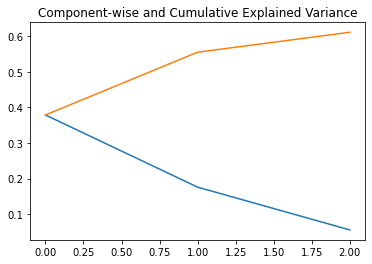

In [17]:
plt.plot(range(3), pca.explained_variance_ratio_)
plt.plot(range(3), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In the above graph, the blue line represents component-wise explained variance while the orange line represents the cumulative explained variance. We are able to explain around 60% variance in the dataset using just three components. Let us now try to visualize each of these decomposed components:

In [29]:
pca_df

PCA_1     PCA_2     PCA_3  Medal
0       0.802974 -0.399815 -0.207555      0
1      -0.779245 -0.155545 -0.650511      0
2       0.641071 -0.990129  1.202992      0
3       0.641071 -0.990129  1.202992      0
4       0.829565 -0.292959  1.242279      0
...          ...       ...       ...    ...
206160  1.381942  0.421651 -0.179402      0
206161 -0.266786  0.423829 -0.489422      0
206162 -0.266786  0.423829 -0.489422      0
206163  2.121231  0.402216  0.036671      0
206164  2.309725  1.099386  0.075958      0

[206165 rows x 4 columns]

In [ ]:
# PCA pair-plotax = sns.pairplot(pca_df, hue = 'Medal', corner = True, height = 3)
ax.fig.suptitle('PCA pair-plot')
handles = ax._legend_data.values()
labels = ax._legend_data.keys()
ax.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
ax.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
ax.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
ax.fig.subplots_adjust(top=0.92, bottom=0.08)
#plt.legend(title = 'Medal', loc = 'upper right', labels = ['No medal', 'Medal'])

In [18]:
# Explained variance ratio
print(f'Explained variance ratio:')
print(*[f'PCA{i+1}: {100*x:.3f}%' for i, x in enumerate(pca.explained_variance_ratio_)], sep=',')

Explained variance ratio:
PCA1: 37.881%, PCA2: 17.616%, PCA3: 5.605%


Text(0, 0.5, 'Explained variance (%)')

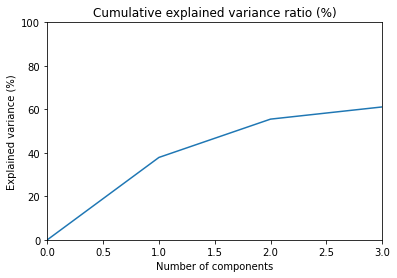

In [19]:
# Cumulative explained variance ratio
x = range(0,4)
y = np.pad(np.cumsum(pca.explained_variance_ratio_), (1,0))*100
plt.plot(x,y)
plt.xlim(0,3)
plt.ylim(0,100)
plt.xlabel('Number of components')
plt.title('Cumulative explained variance ratio (%)')
plt.ylabel('Explained variance (%)')

According to the PCA, the number of attributes cannot be reduced, because at least two of the numerical variables are needed to explain at least 60% of the variability. In the plot graph we can also see that effectively none of the 3 components provides any improvement in the separation of athletes according to the type of medal. Which makes sense since we are not taking into account any of the other categorical variables (sport, country, gender) that are expected to have a lot of influence.

**Nivell 3**

- Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

Outliers containing the numerical attributes of Age, Height, and Weight will be analyzed.

Text(0.5, 1.0, 'Raw data')

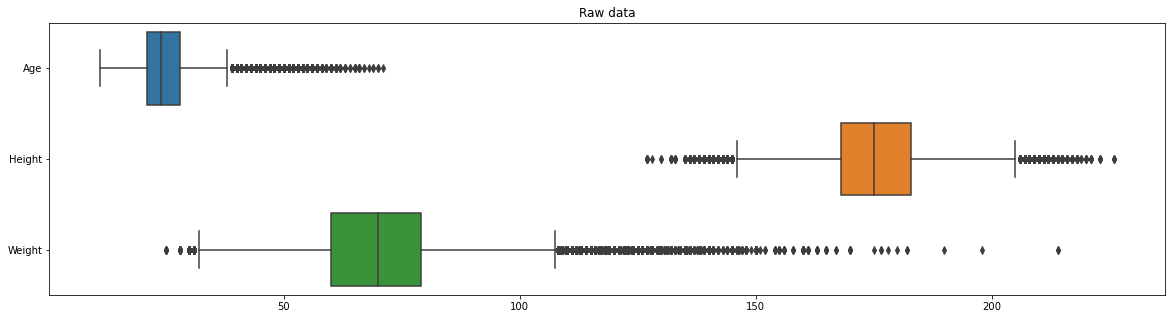

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(data = features_df[['Age','Height','Weight']], orient='h')
plt.title('Raw data')

In [22]:
subset = features_df[['Age','Height','Weight']]
subset.describe()

Age         Height         Weight
count  206165.000000  206165.000000  206165.000000
mean       25.055509     175.371950      70.688337
std         5.483096      10.546088      14.340338
min        11.000000     127.000000      25.000000
25%        21.000000     168.000000      60.000000
50%        24.000000     175.000000      70.000000
75%        28.000000     183.000000      79.000000
max        71.000000     226.000000     214.000000

In [23]:
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1

outliers_bool = (subset < (Q1 - 1.5 * IQR)) |(subset > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis = 0)
outliers_perc = outliers_abs * 100 / subset.dropna().count(axis=0)

print(f'Number of outliers:\n{outliers_abs}\n')
print(f'Percentage of outliers:\n{outliers_perc}')

Number of outliers:
Age       4631
Height    1310
Weight    3174
dtype: int64

Percentage of outliers:
Age       2.246259
Height    0.635413
Weight    1.539544
dtype: float64


There are three possible strategies to carry out the standardization of the numerical variables taking into account the outliers. To scale the data, you can:

- Eliminate outliers in those cases in which the data can be discarded for not being reliable (they come from errors in the taking of measurements or data collection). However, in cases where the data appear to be real, although statistically very rare, it is not advisable to do so.

- Use a "scale" (linear transformation). RobustScaler () is somewhat more robust than StandardScaler () and takes outliers into account. This strategy uses the median and IQR instead of the mean and standard deviation of the second strategy.

- Use a "transformer" (non-linear transformation). PowerTransformer (), for example, allows you to map the data to a normal distribution.

## RobustScaler()

In [25]:
# Pipeline by numerical features:
num_pipe_robust = Pipeline([('imputer', SimpleImputer(strategy = 'median')),('scaler', RobustScaler(with_centering = True, with_scaling = True))])

# Pipeline by categorical features
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse = False))])

# Mix of the two pipelines
preprocessor = ColumnTransformer(transformers=[('num_transf', num_pipe_robust, numerical_columns),('cat_transf', cat_pipe, categorical_columns)])

X = preprocessor.fit_transform(features_df)

X_robust_df = pd.DataFrame(X, columns = columns)
X_robust_df[['Age','Height','Weight']].head()

Age    Height    Weight
0  0.000000  0.333333  0.526316
1 -0.142857 -0.333333 -0.526316
2 -0.428571  0.666667  0.631579
3 -0.428571  0.666667  0.631579
4  0.142857  0.666667  0.631579

## PowerTransformer()

In [26]:
# Pipeline by numerical features:
num_pipe_robust = Pipeline([('imputer', SimpleImputer(strategy = 'median')),('power_transf', PowerTransformer(method = 'box-cox'))])

# Pipeline by categorical features
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse = False))])

# Mix of the two pipelines
preprocessor = ColumnTransformer(transformers=[('num_transf', num_pipe_robust, numerical_columns),('cat_transf', cat_pipe, categorical_columns)])

X = preprocessor.fit_transform(features_df)
X_trans_df = pd.DataFrame(X, columns = columns)
X_trans_df[['Age','Height','Weight']].head()

Age    Height    Weight
0 -0.065554  0.440512  0.718041
1 -0.272484 -0.507753 -0.721472
2 -0.724533  0.913239  0.842064
3 -0.724533  0.913239  0.842064
4  0.130250  0.913239  0.842064

Graphical comparison of the original data with the preprocessed data using StandardScaler, RobustScaler and PowerTransform

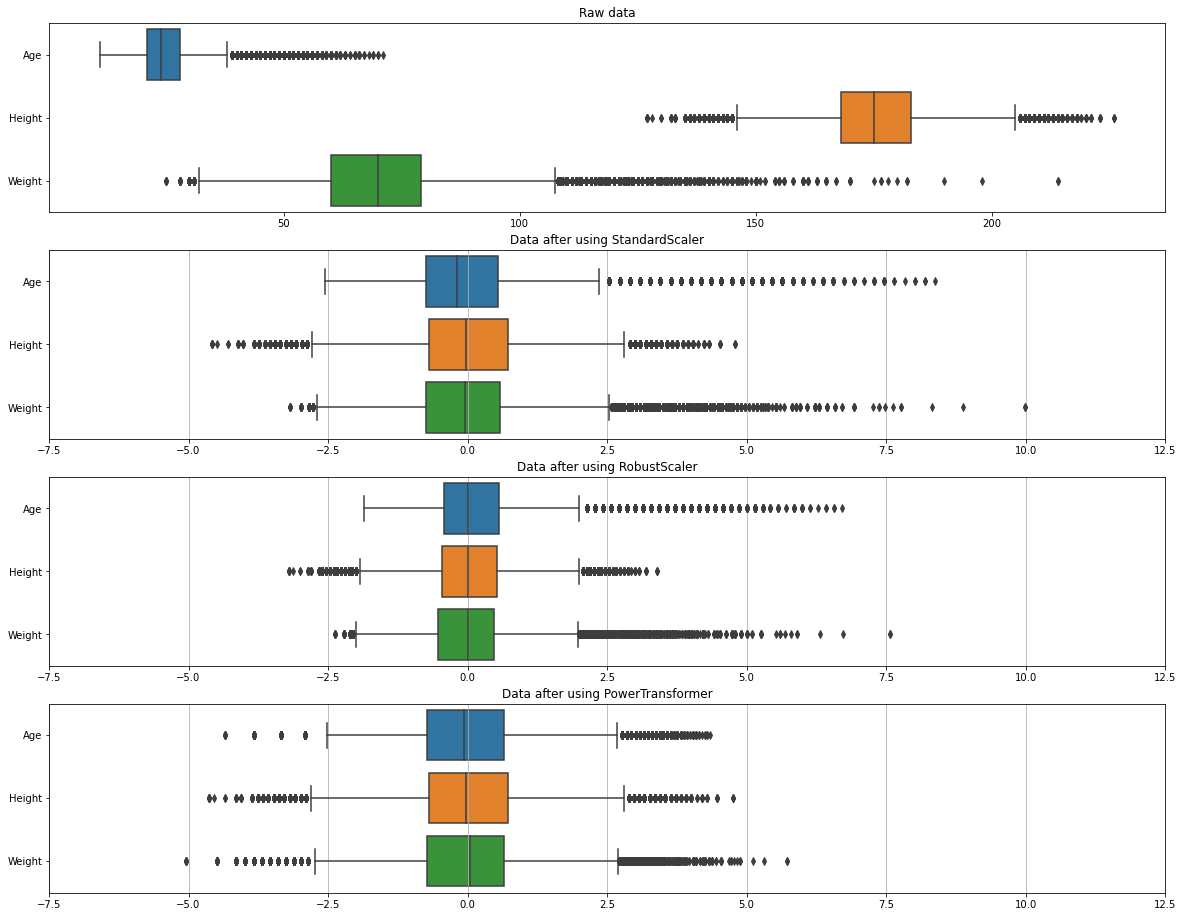

In [28]:
plt.figure(figsize=(20,16))

plt.subplot(4,1,1)
sns.boxplot(data = features_df[['Age','Height','Weight']], orient='h')
plt.title('Raw data')

plt.subplot(4,1,2)
sns.boxplot(data = X_df[['Age','Height','Weight']], orient='h')
plt.xlim(-7.5, 12.5)
plt.title('Data after using StandardScaler')
plt.grid(axis = 'x')

plt.subplot(4,1,3)
sns.boxplot(data = X_robust_df[['Age','Height','Weight']], orient='h')
plt.xlim(-7.5, 12.5)
plt.title('Data after using RobustScaler')
plt.grid(axis = 'x')

plt.subplot(4,1,4)
sns.boxplot(data = X_trans_df[['Age','Height','Weight']], orient='h')
plt.xlim(-7.5, 12.5)
plt.title('Data after using PowerTransformer')
plt.grid(axis = 'x')

The results obtained by RobustScaler() and StandardScaler() do not show much difference. However, with the nonlinear transformation PowerTransform() a better distribution was obtained, with less variability and greater symmetry than with the others.